In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
causalMGMAssociations = [];
directDGAssociations = [];
DeepDAGAssociations = [];
dataFolderPath = "BRCA";
#PAM50Call_RNAseq
clinicalFeatures = [ "HER2_Final_Status_nature2012", "Converted_Stage_nature2012","Node_nature2012",
"breast_carcinoma_progesterone_receptor_status", "breast_carcinoma_estrogen_receptor_status",
"lymph_node_examined_count","person_neoplasm_cancer_status","pathologic_stage"];
print(len(clinicalFeatures));
print(len(set(clinicalFeatures)));
PAM50ProfileGenes = ["ACTR3B", "ANLN", "BAG1", "BCL2", "BIRC5", "BLVRA", "CCNB1", "CCNE1", "CDC20", "CDC6", "CDH3", "CENPF",
 "CEP55", "CXXC5", "EGFR", "ERBB2", "ESR1", "EXO1", "FGFR4", "FOXA1", "FOXC1", "GPR160", "GRB7", "KIF2C", 
 "KRT14", "KRT17", "KRT5", "MAPT", "MDM2", "MELK", "MIA", "MKI67", "MLPH", "MMP11", "MYBL2", "MYC", "NAT1",
 "NDC80", "NUF2", "ORC6L", "PGR", "PHGDH", "PTTG1", "RRM2", "SFRP1", "SLC39A6", "TMEM45B", "TYMS", "UBE2C", "UBE2T"];
print(len(PAM50ProfileGenes));
print(len(set(PAM50ProfileGenes)));

8
8
50
50


In [3]:
#Collect all the associations
DNNSelectionList = [];
fileList = os.listdir(dataFolderPath+"/DNNSelection/");
for fileName in fileList:
    if "DNNSelectedAssociations" in fileName:
        assoDF = pd.read_csv(dataFolderPath+"/DNNSelection/"+fileName);
        for index,row in assoDF.iterrows():
            f1 = row["Feature1"];
            f2 = row["Feature2"];
            #print("F1:"+f1+"      F2:"+f2)
            tempList = [f1,f2];
            tempList.sort();
            tempStr = tempList[0]+"___"+tempList[1];
            if tempStr not in DNNSelectionList:
                DNNSelectionList.append(tempStr);
            if f1 not in DeepDAGAssociations:
                DeepDAGAssociations.append(f1);
print(len(DeepDAGAssociations));

mgmOutputFilePath = dataFolderPath+"/selectedDataByTop2000varFilteredPM50Genes_MGM_associations.csv";
#Collect MGM associations
MGMSelectionList = [];
assoDF = pd.read_csv(mgmOutputFilePath,index_col=0);
for index,row in assoDF.iterrows():
    f1 = row["Feature1"];
    f2 = row["Feature2"];
    if f1 == "PAM50Call_RNAseq" and f2 not in causalMGMAssociations:
        causalMGMAssociations.append(f2);
        directDGAssociations.append(f2);
    if f2 == "PAM50Call_RNAseq" and f1 not in causalMGMAssociations:
        causalMGMAssociations.append(f1);
        directDGAssociations.append(f1);
    tempList = [f1,f2];
    tempList.sort();
    tempStr = tempList[0]+"___"+tempList[1];
    if tempStr not in MGMSelectionList:
        MGMSelectionList.append(tempStr);
print(len(causalMGMAssociations));
print(len(directDGAssociations));

26
0
0


In [4]:
DeepDAGValidatedMolecularList = [];
DeepDAGValidatedClinicalList = [];

causalMGMValidatedMolecularList = [];
causamMGMValidatedClinicalList = [];

directDGValidatedMolecularList = [];
directDGValidatedClinicalList = [];

for ele in DeepDAGAssociations:
    if ele in clinicalFeatures:
        DeepDAGValidatedClinicalList.append(ele);
    if ele in PAM50ProfileGenes:
        DeepDAGValidatedMolecularList.append(ele);
print(DeepDAGValidatedClinicalList);
print(len(DeepDAGValidatedClinicalList));
print(DeepDAGValidatedMolecularList);
print(len(DeepDAGValidatedMolecularList));


for ele in causalMGMAssociations:
    if ele in clinicalFeatures:
        causamMGMValidatedClinicalList.append(ele);
        directDGValidatedClinicalList.append(ele);
    if ele in PAM50ProfileGenes:
        causalMGMValidatedMolecularList.append(ele);
        directDGValidatedMolecularList.append(ele);
print(causamMGMValidatedClinicalList);
print(len(causamMGMValidatedClinicalList));
print(causalMGMValidatedMolecularList);
print(len(causalMGMValidatedMolecularList));

['HER2_Final_Status_nature2012', 'Converted_Stage_nature2012', 'Node_nature2012', 'breast_carcinoma_progesterone_receptor_status', 'person_neoplasm_cancer_status', 'pathologic_stage']
6
['SLC39A6', 'CDH3', 'MIA', 'MYBL2', 'KRT5', 'KRT17', 'KRT14', 'PGR', 'FOXC1', 'PHGDH', 'TMEM45B', 'ESR1', 'MMP11', 'FOXA1', 'FGFR4', 'EGFR', 'MAPT', 'NAT1', 'ERBB2']
19
[]
0
[]
0


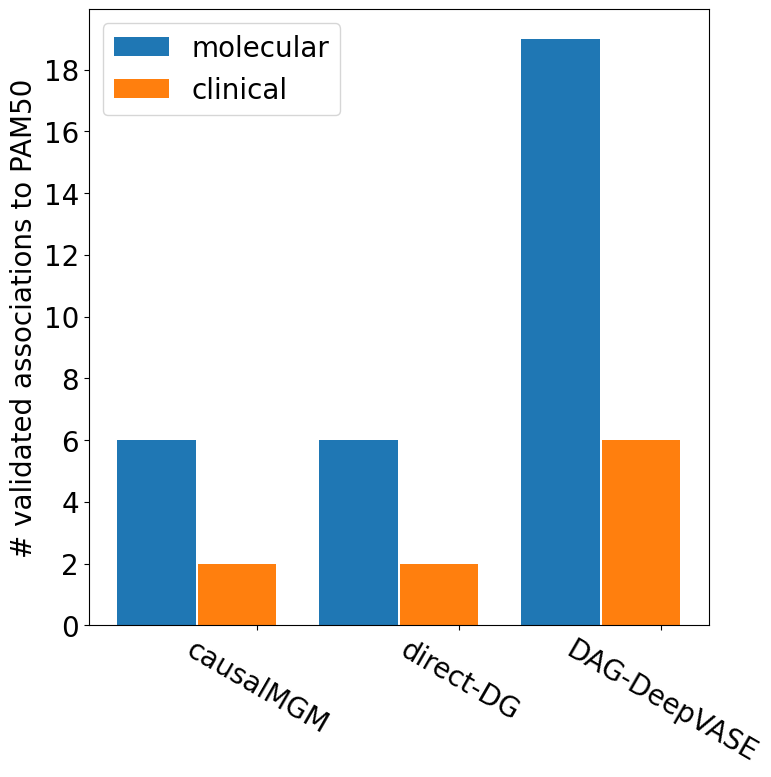

In [23]:
from matplotlib.ticker import MaxNLocator

molecularNumbers = [6,6,19];

clinicalNumbers = [2,2,6];


labels = ["causalMGM","direct-DG","DAG-DeepVASE"];
x = np.arange(len(labels));
width = 0.4;

fig, ax = plt.subplots(figsize=(8,8));
rects1 = ax.bar(x, molecularNumbers, width-0.01,label='molecular', color="tab:blue");
rects2 = ax.bar(x + 0.4, clinicalNumbers, width-0.01,label='clinical', color="tab:orange");

ax.set_ylabel('# validated associations to PAM50',fontsize=20);
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(x+0.5,labels,rotation=-30);
ax.legend(loc="upper left",fontsize=20);
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_locator(MaxNLocator(integer=True));


#fig.tight_layout();
#plt.show();
plt.savefig("Fig/Fig5.A.svg")

In [6]:
causalResultFilePath = dataFolderPath+"/CausalResult.csv";
causalResult = pd.read_csv(causalResultFilePath,index_col=0);

causalMGMGeneToPM50 = [];
causalMGMPM50ToGene = [];
causalPM50ToClinical = [];

directDGGeneToPM50 = [];
directDGPMToGene = [];
directDGPM50TOClinical = [];

DeepGeneToPM50 = [];
DeepPM50ToGene = [];
DeepPM50ToClinical = [];

for index,row in causalResult.iterrows():
    cause = row["Cause"];
    effect = row["Effect"];
    
    tempList = [cause,effect];
    tempList.sort();
    tempStr = tempList[0]+"___"+tempList[1];
    
    if tempStr in MGMSelectionList:
        if cause == "PAM50Call_RNAseq":
            if effect in clinicalFeatures:
                #direct PM to clinical
                directDGPM50TOClinical.append(tempStr);
            else:
                directDGPMToGene.append(tempStr);
        else:
            if cause not in clinicalFeatures and cause in PAM50ProfileGenes:
                directDGGeneToPM50.append(tempStr);
                
    if tempStr in DNNSelectionList:
        if cause == "PAM50Call_RNAseq":
            if effect in clinicalFeatures:
                DeepPM50ToClinical.append(tempStr);
            else:
                DeepPM50ToGene.append(tempStr);
        else:
            if cause not in clinicalFeatures and cause in PAM50ProfileGenes:
                DeepGeneToPM50.append(tempStr);

In [7]:
print("causalMGMGeneToPM50: "+str(len(causalMGMGeneToPM50)));
print("causalMGMPM50ToGene: "+str(len(causalMGMPM50ToGene)));
print("causalPM50ToClinical: "+str(len(causalPM50ToClinical)));

print("directDGGeneToPM50: "+str(len(directDGGeneToPM50)));
print("directDGPMToGene: "+str(len(directDGPMToGene)));
print("directDGPM50TOClinical: "+str(len(directDGPM50TOClinical)));

print("DeepGeneToPM50: "+str(len(DeepGeneToPM50)));
print("DeepPM50ToGene: "+str(len(DeepPM50ToGene)));
print("DeepPM50ToClinical: "+str(len(DeepPM50ToClinical)));

causalMGMGeneToPM50: 0
causalMGMPM50ToGene: 0
causalPM50ToClinical: 0
directDGGeneToPM50: 0
directDGPMToGene: 0
directDGPM50TOClinical: 0
DeepGeneToPM50: 19
DeepPM50ToGene: 0
DeepPM50ToClinical: 1


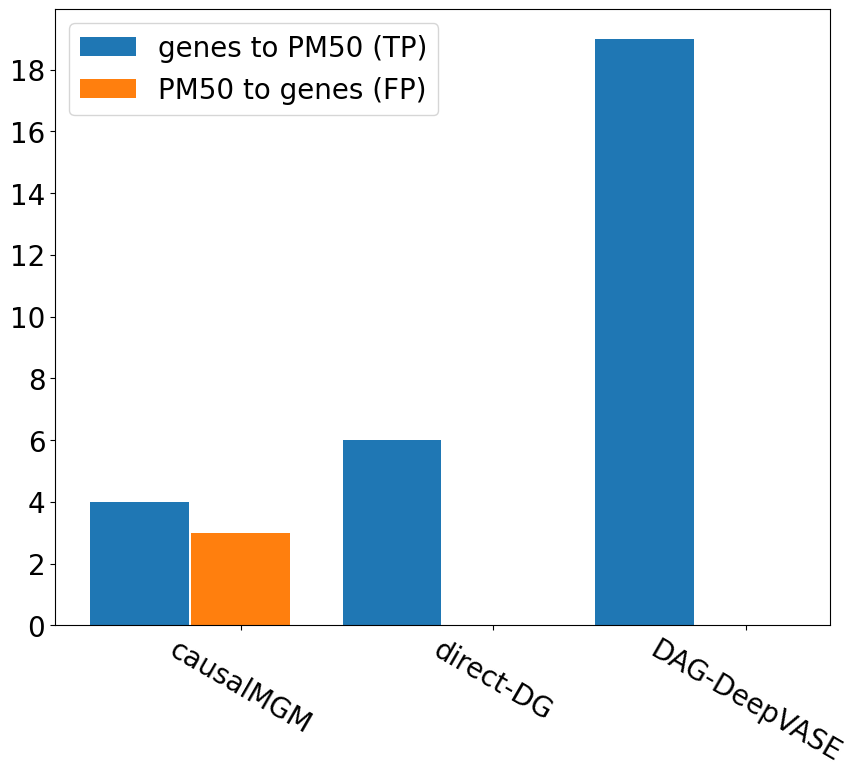

In [24]:
geneToPM = [4,6,19];
PMToGene = [3,0,0];
# PMToClinical = [0,0,0];


labels = ["causalMGM","direct-DG","DAG-DeepVASE"];
x = np.arange(len(labels));
width = 0.4;

fig, ax = plt.subplots(figsize=(10,8));
rects1 = ax.bar(x-0.4, geneToPM, width-0.01,label='genes to PM50 (TP)', color="tab:blue");
rects2 = ax.bar(x, PMToGene, width-0.01,label='PM50 to genes (FP)', color="tab:orange");
# rects3 = ax.bar(x + 0.6, PMToClinical, width-0.01,label='b\w PM50 to clinical features', color="tab:grey");

# ax.set_ylabel('# validated associations to PAM50',fontsize=20);
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xticks(x,labels,rotation=-30);
ax.legend(loc="upper left",fontsize=20);
ax.yaxis.set_major_locator(MaxNLocator(integer=True));

#fig.tight_layout();
#plt.show();
plt.savefig("Fig/Fig5.B.svg")